# Import the libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
import umap.umap_ as umap
from sklearn.metrics import davies_bouldin_score
%config InlineBackend.figure_format = 'svg'
import random
from sklearn import metrics
from sklearn import metrics

# Import the dataset

In [3]:
data = pd.read_excel(r'C:\Users\DANIYA\Downloads\Bank Customer Churn Preprocessed dataset (1).xlsx')

In [4]:
data


Unnamed: 0  credit_score  country  gender  age    tenure   balance  \
0              0     -0.326221        0       0   42 -1.041760 -1.225848   
1              1     -0.440036        2       0   41 -1.387538  0.117350   
2              2     -1.536794        0       0   42  1.032908  1.333053   
3              3      0.501521        0       0   39 -1.387538 -1.225848   
4              4      2.063884        2       0   43 -1.041760  0.785728   
...          ...           ...      ...     ...  ...       ...       ...   
9995        9995      1.246488        0       1   39 -0.004426 -1.225848   
9996        9996     -1.391939        0       1   35  1.724464 -0.306379   
9997        9997      0.604988        0       0   36  0.687130 -1.225848   
9998        9998      1.256835        1       1   42 -0.695982 -0.022608   
9999        9999      1.463771        0       0   28 -0.350204  0.859965   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1          0.021886      1  
1                   1            0              1          0.216534      0  
2                   3            1              0          0.240687      1  
3                   2            0              0         -0.108918      0  
4                   1            1              1         -0.365276      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0         -0.066419      0  
9996                1            1              1          0.027988      0  
9997                1            0              1         -1.008643      1  
9998                2            1              0         -0.125231      1  
9999                1            1              0         -1.076370      0  

[10000 rows x 12 columns]

In [5]:
data = data.drop(["Unnamed: 0"],axis=1)

In [6]:
data

credit_score  country  gender  age    tenure   balance  products_number  \
0        -0.326221        0       0   42 -1.041760 -1.225848                1   
1        -0.440036        2       0   41 -1.387538  0.117350                1   
2        -1.536794        0       0   42  1.032908  1.333053                3   
3         0.501521        0       0   39 -1.387538 -1.225848                2   
4         2.063884        2       0   43 -1.041760  0.785728                1   
...            ...      ...     ...  ...       ...       ...              ...   
9995      1.246488        0       1   39 -0.004426 -1.225848                2   
9996     -1.391939        0       1   35  1.724464 -0.306379                1   
9997      0.604988        0       0   36  0.687130 -1.225848                1   
9998      1.256835        1       1   42 -0.695982 -0.022608                2   
9999      1.463771        0       0   28 -0.350204  0.859965                1   

      credit_card  active_member  estimated_salary  churn  
0               1              1          0.021886      1  
1               0              1          0.216534      0  
2               1              0          0.240687      1  
3               0              0         -0.108918      0  
4               1              1         -0.365276      0  
...           ...            ...               ...    ...  
9995            1              0         -0.066419      0  
9996            1              1          0.027988      0  
9997            0              1         -1.008643      1  
9998            1              0         -0.125231      1  
9999            1              0         -1.076370      0  

[10000 rows x 11 columns]

# Feature types

In [7]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [8]:
cont_list = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
ord_list = ['country', 'products_number']
nom_list = ['gender', 'credit_card', 'active_member', 'churn']

# UMAP

In [9]:
data_umap = data.drop(['churn'], axis=1, inplace = False )

In [10]:
data_umap

credit_score  country  gender  age    tenure   balance  products_number  \
0        -0.326221        0       0   42 -1.041760 -1.225848                1   
1        -0.440036        2       0   41 -1.387538  0.117350                1   
2        -1.536794        0       0   42  1.032908  1.333053                3   
3         0.501521        0       0   39 -1.387538 -1.225848                2   
4         2.063884        2       0   43 -1.041760  0.785728                1   
...            ...      ...     ...  ...       ...       ...              ...   
9995      1.246488        0       1   39 -0.004426 -1.225848                2   
9996     -1.391939        0       1   35  1.724464 -0.306379                1   
9997      0.604988        0       0   36  0.687130 -1.225848                1   
9998      1.256835        1       1   42 -0.695982 -0.022608                2   
9999      1.463771        0       0   28 -0.350204  0.859965                1   

      credit_card  active_member  estimated_salary  
0               1              1          0.021886  
1               0              1          0.216534  
2               1              0          0.240687  
3               0              0         -0.108918  
4               1              1         -0.365276  
...           ...            ...               ...  
9995            1              0         -0.066419  
9996            1              1          0.027988  
9997            0              1         -1.008643  
9998            1              0         -0.125231  
9999            1              0         -1.076370  

[10000 rows x 10 columns]

In [11]:
def UMAP(UMAP_neb, min_dist_UMAP, metr, data, visual):
    import umap.umap_ as umap
   
    np.random.seed(42)
    colors_set1 = ["burlywood", "lightseagreen", "mediumorchid", "orange", "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    data_embedded = umap.UMAP(n_neighbors=UMAP_neb, min_dist=min_dist_UMAP, n_components=2, metric=metr, random_state=0).fit_transform(data)
    data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
    data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
    result = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0', 'UMAP_1'])
    if visual==1:
        sns.lmplot( x="UMAP_0", y="UMAP_1",data=result,fit_reg=False,legend=False,scatter_kws={"s": 10},palette=customPalette_set1) 
        plt.show()
    else:
        pass
    return result

In [12]:
def Clustering(low_d_embedding, algo_dim_reduction, clustering_parameters, clustering_algorithm, visual):
    np.random.seed(42)
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import DBSCAN
        
    colors_set1 = ["burlywood", "lightcoral", "lightseagreen", "mediumorchid", "orange",  "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    
    if clustering_algorithm=="DBSCAN":
        clustering = DBSCAN(eps=clustering_parameters["eps"], min_samples=clustering_parameters["min_samples"]).fit(low_d_embedding)
        
    else:
        return (print ("Invalid Clusering Algorithm Name"))
    
    clusters=clustering.fit_predict(low_d_embedding)
    (values,counts) = np.unique(clusters,return_counts=True)
    low_d_embedding['Cluster'] = clusters
    
    
    if visual==1:
        sns.lmplot( x=algo_dim_reduction+"_0", y=algo_dim_reduction+"_1",
        data=low_d_embedding,
        fit_reg=False, 
        legend=True,
        hue='Cluster', 
        scatter_kws={"s": 10},palette=customPalette_set1) 
        plt.savefig(clustering_algorithm+'.png', dpi=700, bbox_inches='tight')
        plt.show()
    else:
        pass
    
    cluster_labels=low_d_embedding.Cluster.to_list()
    
    if len(np.unique(np.array(cluster_labels)))>1:
        silhouette_score=silhouette_score(low_d_embedding,cluster_labels)
    else:
        silhouette_score=0
        
    return cluster_labels,counts,silhouette_score

In [17]:
def parameter_optimization_UMAP_DBSCAN(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        eps_sample=random.choice(eps)
        min_samples_sample=random.choice(min_samples)

        
        UMAP_emb=UMAP(n_neighbors_sample, min_dist_sample, "euclidean", data, 0)
        
        cluster_labels, counts, sil_score=Clustering(UMAP_emb, "UMAP", {"eps":eps_sample,"min_samples":min_samples_sample}, "DBSCAN",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, eps_sample, min_samples_sample, sil_score]
        if len(counts)<10: 
            parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

In [18]:
n_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
min_dist= [0.001, 0.01, 0.1]
eps=[0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95,
     1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
min_samples=[10,20,30,40,50]

In [19]:
records_UMAP_DBSCAN= parameter_optimization_UMAP_DBSCAN(30, data_umap)

Running iteration number  1
Running iteration number  2
Running iteration number  3
Running iteration number  4
Running iteration number  5
Running iteration number  6
Running iteration number  7
Running iteration number  8
Running iteration number  9
Running iteration number  10
Running iteration number  11
Running iteration number  12
Running iteration number  13
Running iteration number  14
Running iteration number  15
Running iteration number  16
Running iteration number  17
Running iteration number  18
Running iteration number  19
Running iteration number  20
Running iteration number  21
Running iteration number  22
Running iteration number  23
Running iteration number  24
Running iteration number  25
Running iteration number  26
Running iteration number  27
Running iteration number  28
Running iteration number  29
Running iteration number  30


In [20]:
best_parameters_UMAP_DBSCAN=records_UMAP_DBSCAN[-1]

In [21]:
best_parameters_UMAP_DBSCAN

array([8.00000000e+00, 1.00000000e-03, 1.50000000e-01, 1.00000000e+01,
       3.06339096e-01])

*Best parameter choices*
>UMAP <br>
n_neighbors = 24<br>
min_dist = 0.001<br>

>DBSCAN<br>
eps = 0.02<br>
min_samples = 20

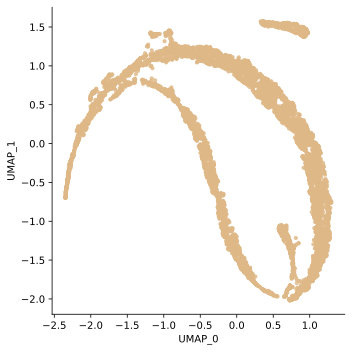

In [22]:
UMAP_emb=UMAP(8, 0.001, "euclidean", data, 1)

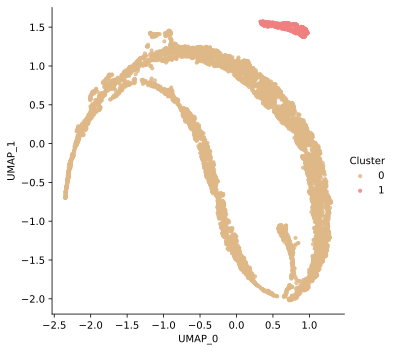

In [23]:
cluster_labels_UMAP_DBSCAN,counts_UMAP_DBSCAN,silhouette_score_UMAP_DBSCAN=Clustering(UMAP_emb, "UMAP", {"eps":0.15,"min_samples":10}, "DBSCAN", 1)

In [24]:
print('Silhouette scores for UMAP with DBSCAN clustering is:', silhouette_score_UMAP_DBSCAN)

Silhouette scores for UMAP with DBSCAN clustering is: 0.2522993387853817


# Supervised UMAP

In [25]:
def SUMAP(SUMAP_neb, min_dist_SUMAP, metr, data, y, visual):
    import umap.umap_ as umap
   
    np.random.seed(42)
    colors_set1 = ["burlywood", "lightseagreen", "mediumorchid", "orange", "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    data_embedded = umap.UMAP(n_neighbors=SUMAP_neb, min_dist=min_dist_SUMAP, n_components=2, metric=metr, random_state=0).fit_transform(data, y)
    data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
    data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
    result = pd.DataFrame(data = data_embedded , 
        columns = ['SUMAP_0', 'SUMAP_1'])
    if visual==1:
        sns.lmplot( x="SUMAP_0", y="SUMAP_1",data=result,fit_reg=False,legend=False,scatter_kws={"s": 10},palette=customPalette_set1) 
        plt.show()
    else:
        pass
    return result

In [26]:
def parameter_optimization_SUMAP_DBSCAN(iterations, data, y):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        eps_sample=random.choice(eps)
        min_samples_sample=random.choice(min_samples)

        
        SUMAP_emb=SUMAP(n_neighbors_sample, min_dist_sample, "euclidean", data, y, 0)
        
        cluster_labels, counts, sil_score=Clustering(SUMAP_emb, "SUMAP", {"eps":eps_sample,"min_samples":min_samples_sample}, "DBSCAN",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, eps_sample, min_samples_sample, sil_score]
        if len(counts)<10:
            parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

In [34]:
records_SUMAP_DBSCAN= parameter_optimization_SUMAP_DBSCAN(50, data_umap, data['churn'])

Running iteration number  1
Running iteration number  2
Running iteration number  3
Running iteration number  4
Running iteration number  5
Running iteration number  6
Running iteration number  7
Running iteration number  8
Running iteration number  9
Running iteration number  10
Running iteration number  11
Running iteration number  12
Running iteration number  13
Running iteration number  14
Running iteration number  15
Running iteration number  16
Running iteration number  17
Running iteration number  18
Running iteration number  19
Running iteration number  20
Running iteration number  21
Running iteration number  22
Running iteration number  23
Running iteration number  24
Running iteration number  25
Running iteration number  26
Running iteration number  27
Running iteration number  28
Running iteration number  29
Running iteration number  30
Running iteration number  31
Running iteration number  32
Running iteration number  33
Running iteration number  34
Running iteration numbe

In [35]:
best_parameters_SUMAP_DBSCAN=records_SUMAP_DBSCAN[-1]

In [36]:
best_parameters_SUMAP_DBSCAN

array([3.00000000e+01, 1.00000000e-02, 8.50000000e-01, 2.00000000e+01,
       7.53615658e-01])

*Best parameter choices*
>SUMAP <br>
n_neighbors = 24<br>
min_dist = 0.001<br>

>DBSCAN<br>
eps = 0.02<br>
min_samples = 20

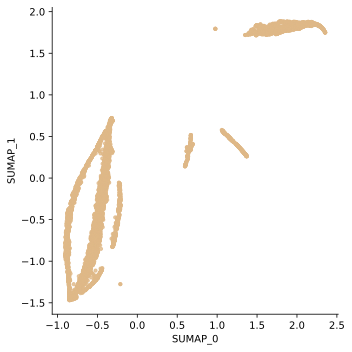

In [37]:
SUMAP_emb=SUMAP(30, 0.01, "euclidean", data, data['churn'], 1)

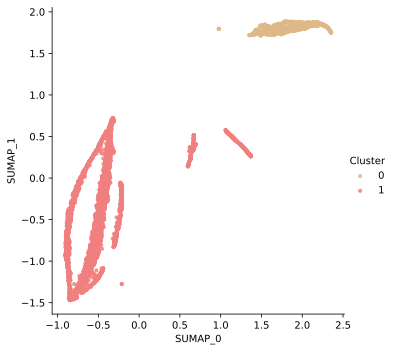

In [38]:
cluster_labels_SUMAP_DBSCAN,counts_SUMAP_DBSCAN,silhouette_score_SUMAP_DBSCAN=Clustering(SUMAP_emb, "SUMAP", {"eps":0.85,"min_samples":20}, "DBSCAN", 1)

In [39]:
print('Silhouette scores for SUMAP with DBSCAN clustering is:', silhouette_score_SUMAP_DBSCAN)

Silhouette scores for SUMAP with DBSCAN clustering is: 0.7465177801892892
